In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import string
pd.options.mode.chained_assignment = None

full_df = pd.read_csv("reviews.csv", nrows=5000)
df = full_df[["text"]]
df["text"] = df["text"].astype(str)
full_df.head()

,Id,profileName,text,rating,helpful
0,1,Raunav Dasgupta,"The product is okay, you can easily transfer t...",4,6
1,2,SUMAN,I am using it with my iPhone 13 and it works p...,4,2
2,3,Deepak nagpal,This is a very compact pendrive and it holds t...,5,0
3,4,ajay chauhan,Osm🔥,3,0
4,5,JAYA,Highly versatile product. A worth buy . Doing ...,5,0


In [2]:
df["text_lower"] = df["text"].str.lower()
df.head()

,text,text_lower
0,"The product is okay, you can easily transfer t...","the product is okay, you can easily transfer t..."
1,I am using it with my iPhone 13 and it works p...,i am using it with my iphone 13 and it works p...
2,This is a very compact pendrive and it holds t...,this is a very compact pendrive and it holds t...
3,Osm🔥,osm🔥
4,Highly versatile product. A worth buy . Doing ...,highly versatile product. a worth buy . doing ...


In [3]:
df.drop(["text_lower"], axis=1, inplace=True)

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,text,text_wo_punct
0,"The product is okay, you can easily transfer t...",The product is okay you can easily transfer th...
1,I am using it with my iPhone 13 and it works p...,I am using it with my iPhone 13 and it works p...
2,This is a very compact pendrive and it holds t...,This is a very compact pendrive and it holds t...
3,Osm🔥,Osm🔥
4,Highly versatile product. A worth buy . Doing ...,Highly versatile product A worth buy Doing go...


In [4]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [5]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["text_wo_punct"].apply(lambda text: remove_stopwords(text))
df.head()

,text,text_wo_punct,text_wo_stop
0,"The product is okay, you can easily transfer t...",The product is okay you can easily transfer th...,The product okay easily transfer files much ne...
1,I am using it with my iPhone 13 and it works p...,I am using it with my iPhone 13 and it works p...,I using iPhone 13 works perfectly Only one pro...
2,This is a very compact pendrive and it holds t...,This is a very compact pendrive and it holds t...,This compact pendrive holds tons pictures My i...
3,Osm🔥,Osm🔥,Osm🔥
4,Highly versatile product. A worth buy . Doing ...,Highly versatile product A worth buy Doing go...,Highly versatile product A worth buy Doing goo...


In [6]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('I', 23),
 ('product', 21),
 ('easy', 12),
 ('phone', 11),
 ('pendrive', 11),
 ('This', 10),
 ('transfer', 9),
 ('app', 9),
 ('good', 9),
 ('iPhone', 8)]

In [7]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["text_wo_stopfreq"] = df["text_wo_stop"].apply(lambda text: remove_freqwords(text))
df.head()

,text,text_wo_punct,text_wo_stop,text_wo_stopfreq
0,"The product is okay, you can easily transfer t...",The product is okay you can easily transfer th...,The product okay easily transfer files much ne...,The okay easily files much needed IOS users ha...
1,I am using it with my iPhone 13 and it works p...,I am using it with my iPhone 13 and it works p...,I using iPhone 13 works perfectly Only one pro...,using 13 works perfectly Only one problem foun...
2,This is a very compact pendrive and it holds t...,This is a very compact pendrive and it holds t...,This compact pendrive holds tons pictures My i...,compact holds tons pictures My iCloud almost f...
3,Osm🔥,Osm🔥,Osm🔥,Osm🔥
4,Highly versatile product. A worth buy . Doing ...,Highly versatile product A worth buy Doing go...,Highly versatile product A worth buy Doing goo...,Highly versatile A worth buy Doing far Makes e...


In [8]:
df.drop(["text_wo_punct", "text_wo_stop"], axis=1, inplace=True)

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["text_wo_stopfreqrare"] = df["text_wo_stopfreq"].apply(lambda text: remove_rarewords(text))
df.head()

,text,text_wo_stopfreq,text_wo_stopfreqrare
0,"The product is okay, you can easily transfer t...",The okay easily files much needed IOS users ha...,The okay easily files much needed IOS users ha...
1,I am using it with my iPhone 13 and it works p...,using 13 works perfectly Only one problem foun...,using 13 works perfectly Only one problem foun...
2,This is a very compact pendrive and it holds t...,compact holds tons pictures My iCloud almost f...,compact holds tons pictures My iCloud almost f...
3,Osm🔥,Osm🔥,Osm🔥
4,Highly versatile product. A worth buy . Doing ...,Highly versatile A worth buy Doing far Makes e...,Highly versatile A worth buy Doing far Makes e...


In [9]:
#STEMMING
from nltk.stem.porter import PorterStemmer

# Drop the two columns 
df.drop(["text_wo_stopfreq", "text_wo_stopfreqrare"], axis=1, inplace=True) 

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text"].apply(lambda text: stem_words(text))
df.head()

,text,text_stemmed
0,"The product is okay, you can easily transfer t...","the product is okay, you can easili transfer t..."
1,I am using it with my iPhone 13 and it works p...,i am use it with my iphon 13 and it work perfe...
2,This is a very compact pendrive and it holds t...,thi is a veri compact pendriv and it hold ton ...
3,Osm🔥,osm🔥
4,Highly versatile product. A worth buy . Doing ...,highli versatil product. a worth buy . do good...


In [10]:
from nltk.stem.snowball import SnowballStemmer
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [12]:
df = pd.read_csv('reviews.csv')
df = df.tail(1000)

In [13]:
list(df)

['Id', 'profileName', 'text', 'rating', 'helpful']

In [14]:
df.tail()

,Id,profileName,text,rating,helpful
45,46,Sarfaraz h Batliwala,Good productWorth buying,5,0
46,47,hansraj meena,Worst pendrive ever.. after 6-7 months it does...,1,0
47,48,sajan kapil,I bought this pendrive to transfer pictures fr...,5,1
48,49,A. Pavan Kumar,Refund me,2,1
49,50,manoj Kumar das,Usb3.0 is not proper working in laptop,2,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           50 non-null     int64 
 1   profileName  50 non-null     object
 2   text         49 non-null     object
 3   rating       50 non-null     int64 
 4   helpful      50 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [16]:
print(df.shape)

(50, 5)


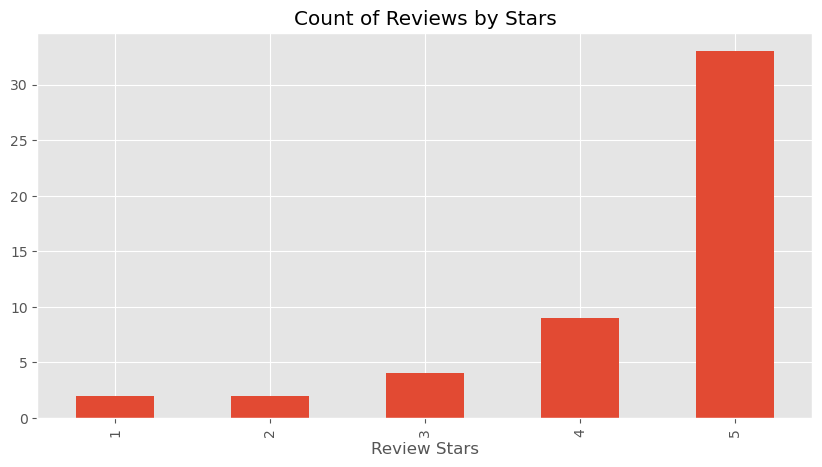

In [17]:
ax = df['rating'].value_counts().sort_index() \
    .plot(kind='bar', 
          title='Count of Reviews by Stars',
          figsize=(10, 5))

ax.set_xlabel('Review Stars')
plt.show()

In [18]:
example = df['text'][47]
print(example)

I bought this pendrive to transfer pictures from my ipad and my android phone to my computer. Worked great.. But it should be noted that iOS had to install an app to use it. I operated following the seller's description, the app worked fine.A perfect product!


In [19]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I',
 'bought',
 'this',
 'pendrive',
 'to',
 'transfer',
 'pictures',
 'from',
 'my',
 'ipad']

In [20]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [22]:
sia

In [23]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.8356}

In [24]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/50 [00:00<?, ?it/s]

TypeError: 'float' object is not iterable

In [25]:
res

{1: {'neg': 0.057, 'neu': 0.818, 'pos': 0.125, 'compound': 0.6369},
 2: {'neg': 0.087, 'neu': 0.76, 'pos': 0.153, 'compound': 0.7579},
 3: {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.877},
 4: {'neg': 0.706, 'neu': 0.294, 'pos': 0.0, 'compound': -0.34},
 5: {'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.8591},
 6: {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.2382},
 7: {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.8671},
 8: {'neg': 0.051, 'neu': 0.622, 'pos': 0.327, 'compound': 0.8391},
 9: {'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'compound': 0.6697},
 10: {'neg': 0.064, 'neu': 0.911, 'pos': 0.025, 'compound': -0.4577},
 11: {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249},
 12: {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}}

In [26]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [27]:
vaders.head()

,Id,neg,neu,pos,compound,profileName,text,rating,helpful
0,1,0.057,0.818,0.125,0.6369,Raunav Dasgupta,"The product is okay, you can easily transfer t...",4,6
1,2,0.087,0.760,0.153,0.7579,SUMAN,I am using it with my iPhone 13 and it works p...,4,2
2,3,0.000,0.854,0.146,0.8770,Deepak nagpal,This is a very compact pendrive and it holds t...,5,0
3,4,0.706,0.294,0.000,-0.3400,ajay chauhan,Osm🔥,3,0
4,5,0.000,0.774,0.226,0.8591,JAYA,Highly versatile product. A worth buy . Doing ...,5,0


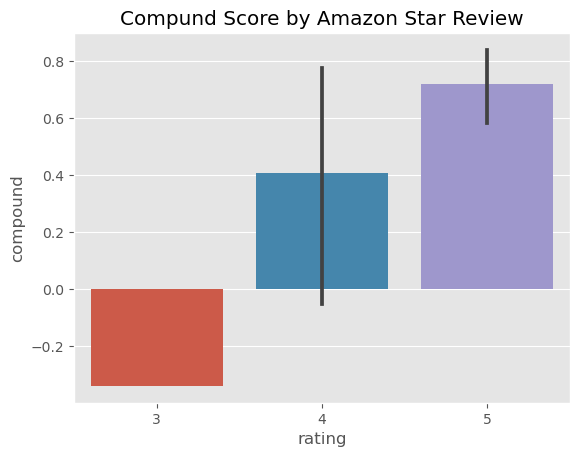

In [28]:
ax = sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

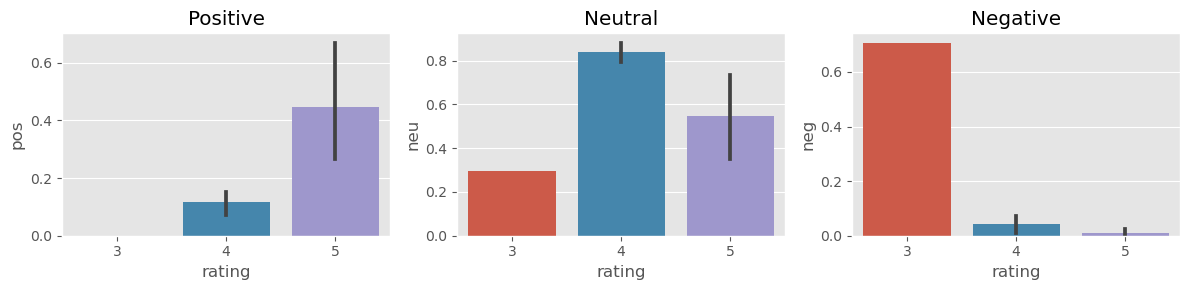

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()